In [56]:
import os
import torch
import torchaudio
import matplotlib.pyplot as plt
from pathlib import Path

In [69]:
def load_audio_files(path: str, label:str):

    dataset = []
    walker = sorted(str(p) for p in Path(path).glob(f'*.wav'))

    for i, file_path in enumerate(walker):
        path, filename = os.path.split(file_path)
    
        # Load audio
        waveform, sample_rate = torchaudio.load(file_path, num_frames=220500)
        dataset.append([waveform, sample_rate, label])
        
    return dataset

In [70]:
import os
import re
root = '/mnt/c/Downloads/cs8803-audio-files/'

re_blender = r'^gd'
gd = []
for i in os.listdir(root):
    if re.search(re_blender, i):
        gd += load_audio_files(root+i+'/', 'gd')

In [71]:
print(f'Length of gd dataset: {len(gd)}')

Length of gd dataset: 1


In [72]:
print(len(gd[0][0][0]))

220500


In [73]:
gd_waveform = gd[0][0]
gd_sample_rate = gd[0][1]
print(f'Yes Waveform: {gd_waveform}')
print(f'Yes Sample Rate: {gd_sample_rate}')
print(f'Yes Label: {gd[0][2]}\n')

Yes Waveform: tensor([[ 0.0000,  0.0000,  0.0000,  ..., -0.0022,  0.0047, -0.0015]])
Yes Sample Rate: 44100
Yes Label: gd



In [74]:
gd_waveform.shape

torch.Size([1, 220500])

In [75]:
def show_waveform(waveform, sample_rate, label):
    print("Waveform: {}\nSample rate: {}\nLabels: {} \n".format(waveform, sample_rate, label))
    new_sample_rate = sample_rate/10
   
    # Resample applies to a single channel, we resample first channel here
    channel = 0
    waveform_transformed = torchaudio.transforms.Resample(sample_rate, new_sample_rate)(waveform[channel,:].view(1,-1))

    print("Shape of transformed waveform: {}\nSample rate: {}".format(waveform_transformed.size(), new_sample_rate))

    plt.figure()
    plt.plot(waveform_transformed[0,:].numpy())

Waveform: tensor([[ 0.0000,  0.0000,  0.0000,  ..., -0.0022,  0.0047, -0.0015]])
Sample rate: 44100
Labels: gd 

Shape of transformed waveform: torch.Size([1, 22050])
Sample rate: 4410.0


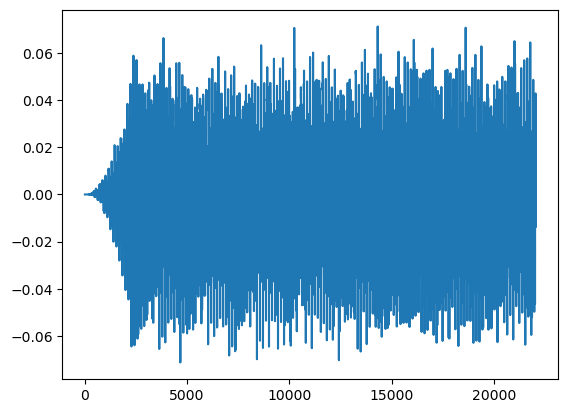

In [76]:
show_waveform(gd_waveform, gd_sample_rate, 'gd')

In [77]:
def show_spectrogram(waveform_classA, waveform_classB):
    blender_spectrogram = torchaudio.transforms.Spectrogram()(waveform_classA)
    print("\nShape of blender spectrogram: {}".format(blender_spectrogram.size()))
    
    noise_spectrogram = torchaudio.transforms.Spectrogram()(waveform_classB)
    print("Shape of noise spectrogram: {}".format(noise_spectrogram.size()))

    plt.figure()
    plt.subplot(1, 2, 1)
    plt.title("Features of {}".format('blender'))
    plt.imshow(blender_spectrogram.log2()[0,:,:].numpy(), cmap='viridis')
    
    plt.subplot(1, 2, 2)
    plt.title("Features of {}".format('noise'))
    plt.imshow(noise_spectrogram.log2()[0,:,:].numpy(), cmap='viridis')  


Shape of blender spectrogram: torch.Size([1, 201, 1103])
Shape of noise spectrogram: torch.Size([1, 201, 1103])


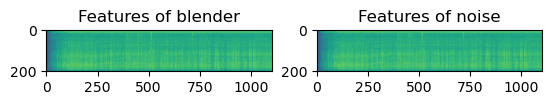

In [78]:
show_spectrogram(gd_waveform, gd_waveform)

In [79]:
def create_spectrogram_images(trainloader, label_dir):
    #make directory
    directory = f'./test_new_env/{label_dir}/'
    if(os.path.isdir(directory)):
        print("Data exists for", label_dir)
    else:
        os.makedirs(directory, mode=0o777, exist_ok=True)
        
        for i, data in enumerate(trainloader):

            waveform = data[0]
            sample_rate = data[1][0]
            label = data[2]

            # create transformed waveforms
            spectrogram_tensor = torchaudio.transforms.Spectrogram()(waveform)     
            
            # fig = plt.figure()
            plt.imsave(f'./test_new_env/{label_dir}/spec_img{i}.png', spectrogram_tensor[0].log2()[0,:,:].numpy(), cmap='viridis')

In [80]:
train_gd = torch.utils.data.DataLoader(gd, batch_size=1,
                                            shuffle=True, num_workers=0)
create_spectrogram_images(train_gd, 'gd')